In [1]:
!pip install tensorflow_datasets
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, 
                       as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

In [3]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [4]:
embedding_dim = 64

model = keras.Sequential([
  keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(6, activation='sigmoid'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [6]:
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer="adam", metrics='acc')

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 8s 20ms/step - loss: 0.7433 - acc: 0.5000 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 0.6904 - acc: 0.5178 - val_loss: 0.6888 - val_acc: 0.6035
Epoch 3/10
391/391 [==============================] - 8s 19ms/step - loss: 0.6848 - acc: 0.5371 - val_loss: 0.6799 - val_acc: 0.5170
Epoch 4/10
391/391 [==============================] - 7s 19ms/step - loss: 0.6639 - acc: 0.5662 - val_loss: 0.6441 - val_acc: 0.6264
Epoch 5/10
391/391 [==============================] - 7s 19ms/step - loss: 0.6044 - acc: 0.7012 - val_loss: 0.5747 - val_acc: 0.7270
Epoch 6/10
391/391 [==============================] - 7s 19ms/step - loss: 0.5235 - acc: 0.8039 - val_loss: 0.5000 - val_acc: 0.8110
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 0.4469 - acc: 0.8522 - val_loss: 0.4381 - val_acc: 0.8510
Epoch 8/10
391/391 [==============================] - 8s 19ms/step - 

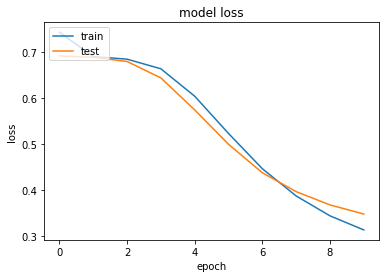

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

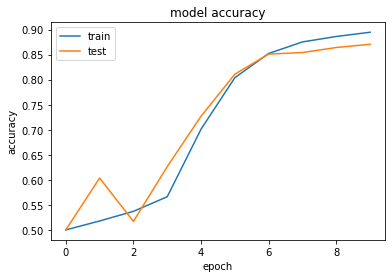

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()